### Prediction Of Employee Attrition

In [1]:
# Importing Libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE

In [41]:
# Importing Data
from google.colab import files
uploaded = files.upload()

Saving Indicino project.xlsx to Indicino project (3).xlsx


In [3]:
df = pd.read_excel('Indicino project.xlsx')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.shape

(1470, 35)

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
# Checking for Null Values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
# Getting the count of Employee that Stayed and Left

df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Attrition'>

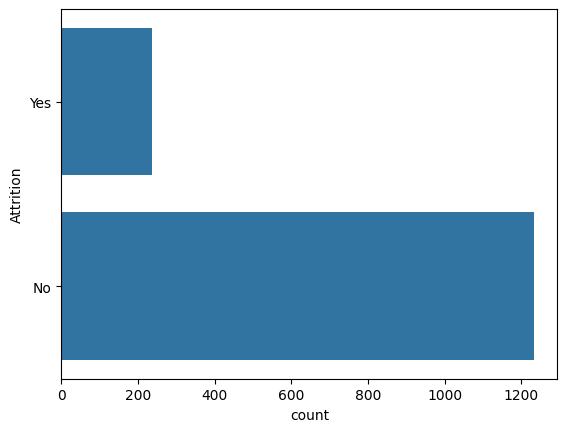

In [10]:
# visuallizing the number of employees that stayed and Left
sns.countplot(df['Attrition'])

<Axes: xlabel='Age', ylabel='count'>

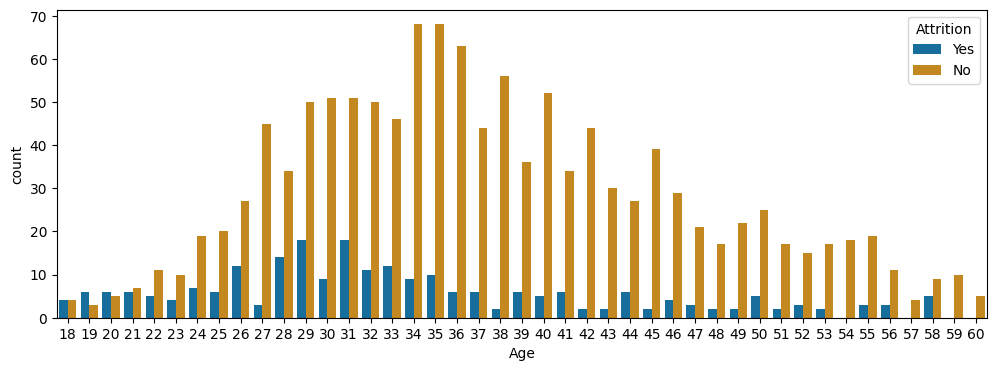

In [11]:
# Showing the number of Employees that left and stayed by age
plt.subplots(figsize=(12,4))
sns.countplot(x = 'Age', hue = 'Attrition', data = df, palette = 'colorblind')

In [12]:
#Print all data types and their unique values
for column in df.columns:
  if df[column].dtype == object:
    print(str(column) + ':' + str(df[column].unique()))
    print(df[column].value_counts())
    print('___________________________________________________________')

Attrition:['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
___________________________________________________________
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
___________________________________________________________
Department:['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
___________________________________________________________
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
___________________________________________________________
Gender:['Female

In [13]:
# Removing unusful columns
df = df.drop('Over18', axis = 1)
df = df.drop('EmployeeNumber', axis = 1)
df = df.drop('StandardHours', axis = 1)
df = df.drop('EmployeeCount', axis = 1)

In [14]:
# Get correlation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [15]:
# Impact of Monthly Income on employee retentiom
pd.crosstab(df.MonthlyIncome, df.Attrition)

Attrition,No,Yes
MonthlyIncome,,
1009,0,1
1051,1,0
1052,1,0
1081,0,1
1091,0,1
...,...,...
19859,0,1
19926,1,0
19943,1,0


In [16]:
# Impact of Department Income on employee retentiom
pd.crosstab(df.Department , df.Attrition)

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


<Axes: xlabel='Department'>

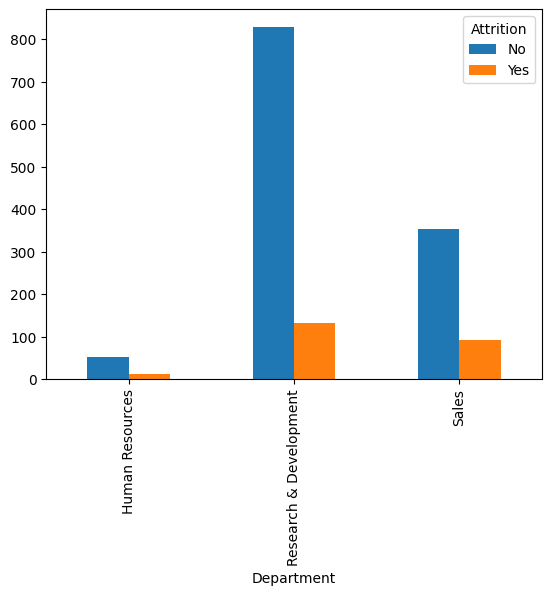

In [17]:
pd.crosstab(df.Department , df.Attrition).plot(kind = 'bar')

In [18]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [19]:
# Converting categorical features into Numerical
label_encoder = LabelEncoder()

In [20]:
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])
df['BusinessTravel'] = label_encoder.fit_transform(df['BusinessTravel'])
df['Department'] = label_encoder.fit_transform(df['Department'])
df['EducationField'] = label_encoder.fit_transform(df['EducationField'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['JobRole'] = label_encoder.fit_transform(df['JobRole'])
df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])
df['OverTime'] = label_encoder.fit_transform(df['OverTime'])

In [21]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

In [23]:
# lets get the correlation of all columns
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


<Axes: >

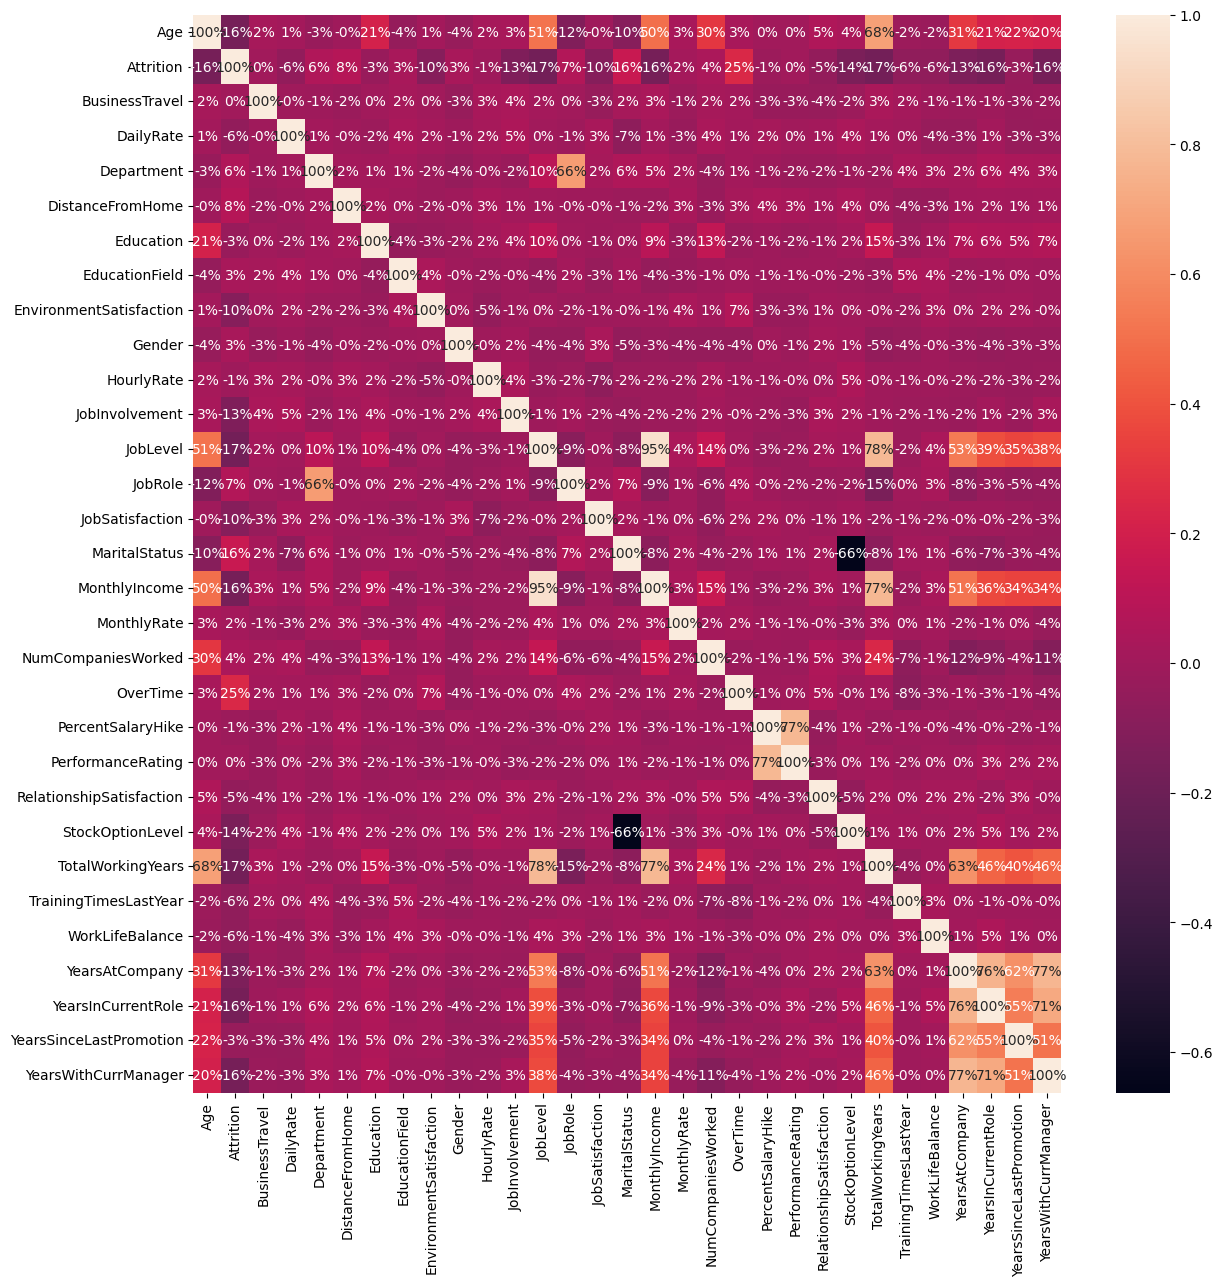

In [24]:
#visualize the correlation
plt.figure(figsize = (14,14))
sns.heatmap(df.corr(), annot = True, fmt = '.0%')

In [25]:
# splitting data into independent variables
x = df.drop('Attrition', axis = 1)
y = df['Attrition']

<Axes: xlabel='Attrition'>

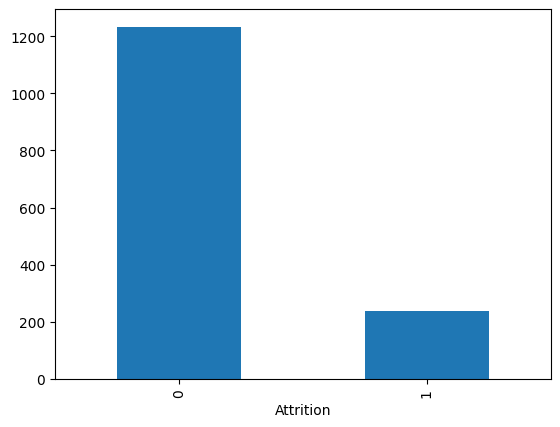

In [26]:
y.value_counts().plot(
    kind = 'bar'
)

In [27]:
#Resampling the data
smote = SMOTE(sampling_strategy = 'auto', random_state = 42)
X_resampled, Y_resampled = smote.fit_resample(x,y)

<Axes: xlabel='Attrition'>

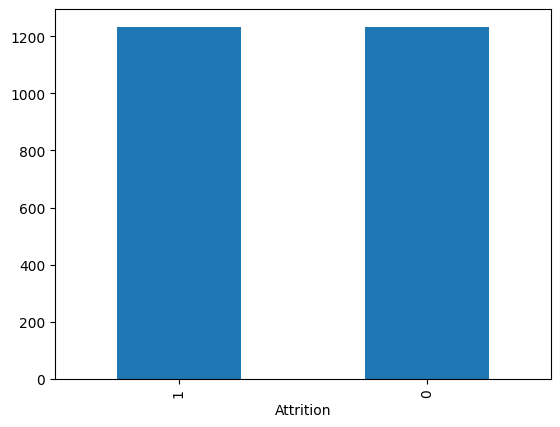

In [28]:
Y_resampled.value_counts().plot(
    kind = 'bar'
)

In [29]:
# splittng data into Training and testing
x_train, x_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size = 0.2, random_state = 42)


In [30]:
print(x_train.shape)
print(X_resampled.shape)

(1972, 30)
(2466, 30)


In [31]:
# Random Forest
Random_forest_model = RandomForestClassifier()
Random_forest_model.fit(x_train, y_train)

RandomForestClassifier()

In [32]:
Random_forest_model.score(x_train, y_train)

1.0

In [33]:
y_pred = Random_forest_model.predict(x_test)

In [34]:
# checking accuracy
model_accuracy = accuracy_score(y_test, y_pred)
print("accuracy score of the model =", model_accuracy)

accuracy score of the model = 0.8987854251012146


In [35]:
# checking precision
model_precision = precision_score(y_test, y_pred)
print("precision score of the model =", model_precision)

precision score of the model = 0.9110169491525424


In [36]:
# checking recall
model_recall = recall_score(y_test, y_pred)
print("recall score of the model =", model_recall)

recall score of the model = 0.8811475409836066


In [37]:
# checking f1
model_f1 = f1_score(y_test, y_pred)
print("f1 score of the model =", model_f1)

f1 score of the model = 0.8958333333333333


In [38]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       250
           1       0.91      0.88      0.90       244

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494



In [39]:
# Feature Impotance Metrix in Random Forest/ Feature Extraction
score_list = Random_forest_model.feature_importances_
list_of_features = list(x.columns)
score_df = pd.DataFrame({"Feature" : list_of_features, 'score' : score_list})
score_df.sort_values(by = 'score', ascending = False)

,Feature,score
22,StockOptionLevel,0.081411
15,MonthlyIncome,0.066304
13,JobSatisfaction,0.060173
10,JobInvolvement,0.059023
7,EnvironmentSatisfaction,0.045210
16,MonthlyRate,0.044254
29,YearsWithCurrManager,0.041868
2,DailyRate,0.039808
0,Age,0.039123
9,HourlyRate,0.038797


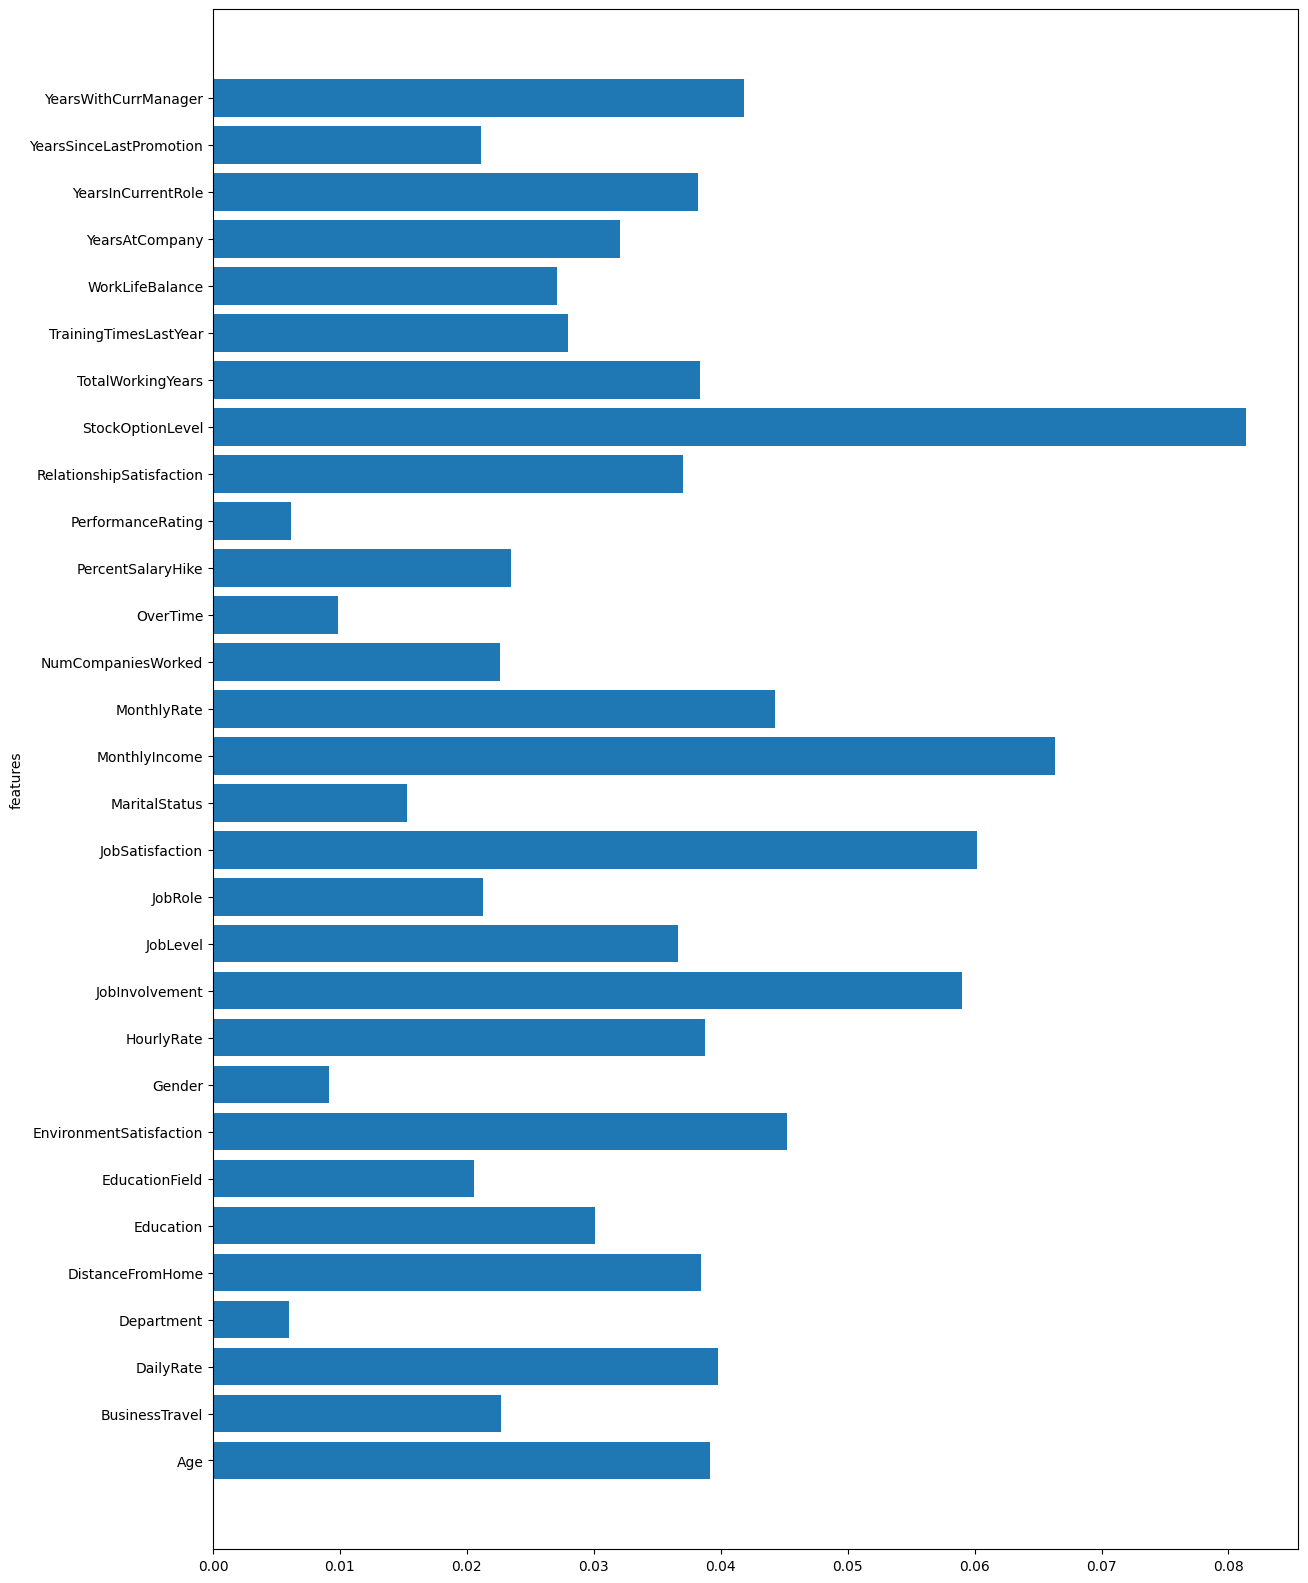

In [40]:
# visualizing how all the factors affects attrition
list_of_features = list(x.columns)
plt.figure(figsize = (14,20))
plt.barh(range(len(list_of_features)), Random_forest_model.feature_importances_)
plt.yticks(np.arange(len(list_of_features)),list_of_features)
plt.ylabel('features')
plt.show()

### CASE ANSWERS

1.   The three main causes of Attriton in the company are Stock Option Level, Monthly income and Job sactifaction
2.   The job roles that are likely to resign the company within the current year are Research & Development and Sales
3.  The age band that are likely to be retained is between 30 to 45
4.  If i am the HR of Indicino, i will look inti the stock option level and change things to reduce the Attrition rate and also see how the monthly income can compensate the effort put in especially during overtime
5.   The years with current manager in relation to stock option level is 2% which is the main reason for attrition and in relation with monthly income, it is 34%. The lenght of stay with current manager has little impact on the cause of Attrition
6.   The monthly income of the junior employees is very low and inturn is leading  to the high attrition rate in Indicino.







